# 因子分析

In [1]:
# 导入必要的库
import sys
import traceback
from factor_calculator import FactorCalculator
from factor_metrics import FactorMetrics
from get_market_value import get_monthly_last_trading_days, get_market_value_data
from process_gdp import process_gdp_data
import warnings
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

## 1. 数据加载

In [2]:
print("正在获取交易日历...")
last_trading_days = get_monthly_last_trading_days()
print(f"共获取到 {len(last_trading_days)} 个交易日")

# 获取市值数据
market_value_data = get_market_value_data(last_trading_days)

if market_value_data is not None:
    # 保存到CSV文件
    market_value_data.to_csv('data/monthly_market_value.csv', index=False)
    print("\n数据已保存到 monthly_market_value.csv")


正在获取交易日历...
共获取到 120 个交易日


获取市值数据: 100%|██████████| 120/120 [07:53<00:00,  3.95s/it]



数据已保存到 monthly_market_value.csv


In [2]:
# 计算GDP信号
signal = process_gdp_data()
signal.to_csv('data/gdp_signal.csv')

## 2.因子计算，并保存因子数据

In [2]:
calculator = FactorCalculator()

# 计算所有因子并自动保存到默认位置 
factors = calculator.calculate_all_factors()


开始计算因子...


计算因子进度:  25%|██▌       | 1/4 [00:00<00:01,  2.43it/s]


Factor1 计算完成


计算因子进度:  50%|█████     | 2/4 [00:01<00:01,  1.15it/s]


Factor2 计算完成


计算因子进度:  75%|███████▌  | 3/4 [00:03<00:01,  1.21s/it]


Factor3 计算完成


计算因子进度: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Factor4 计算完成

所有因子计算完成

因子数据已保存到: e:\ALL\CUHKSZ\2025春\MFE5210\Assignment\MFE5210_Asg3\data\factors_data.pkl


## 3. 计算因子指标

In [5]:
# 初始化 FactorMetrics 类
factor_metrics = FactorMetrics(data_dir='data')

# 加载数据
factors, returns = factor_metrics.load_data(start_date='2015-01-01', end_date='2024-12-31')

# 计算所有因子的IC
ic_series_df, ic_stats_df = factor_metrics.calculate_all_factors_ic(factors, returns)

# 查看IC统计信息
print("\n所有因子的IC统计信息：")
ic_stats_df


加载因子数据...
加载收益率数据...
转换收益率数据格式...

数据预处理完成。
计算所有因子的IC...

计算因子 Factor1 的IC...
Factor1 IC统计信息:
IC均值: 0.0683
IC标准差: 0.1097
IC_IR: 9.8816
IC为正的比例: 77.50%

计算因子 Factor2 的IC...
Factor2 IC统计信息:
IC均值: 0.1037
IC标准差: 0.0960
IC_IR: 17.1391
IC为正的比例: 90.32%

计算因子 Factor3 的IC...
Factor3 IC统计信息:
IC均值: 0.0658
IC标准差: 0.0898
IC_IR: 11.6394
IC为正的比例: 73.91%

计算因子 Factor4 的IC...
Factor4 IC统计信息:
IC均值: 0.0652
IC标准差: 0.0726
IC_IR: 14.2629
IC为正的比例: 86.67%

所有因子IC计算完成

所有因子的IC统计信息：


,IC_mean,IC_std,IC_IR,IC_positive_ratio,factor_direction
Factor2,0.103684,0.096033,17.139102,0.903226,-1
Factor4,0.065228,0.072599,14.262896,0.866667,-1
Factor3,0.065837,0.089792,11.639413,0.739130,-1
Factor1,0.068273,0.109679,9.881574,0.775000,-1


In [6]:
# 绘制IC相关性热力图
factor_metrics.plot_ic_heatmap(
    ic_series_df,
    save_path='ic_results/ic_correlation.png'
)

# 绘制IC时间序列图
factor_metrics.plot_ic_ts(
    ic_series_df,
    save_path='ic_results/ic_timeseries.png'
)

# 保存结果
ic_series_df.to_csv('ic_results/ic_series.csv')
ic_stats_df.to_csv('ic_results/ic_stats.csv')


IC相关性热力图已保存至: ic_results/ic_correlation.png
IC时间序列图已保存至: ic_results/ic_timeseries.png


## 4. 计算和可视化因子相关性

加载因子数据...
加载收益率数据...
转换收益率数据格式...

数据预处理完成。


<Figure size 640x480 with 0 Axes>

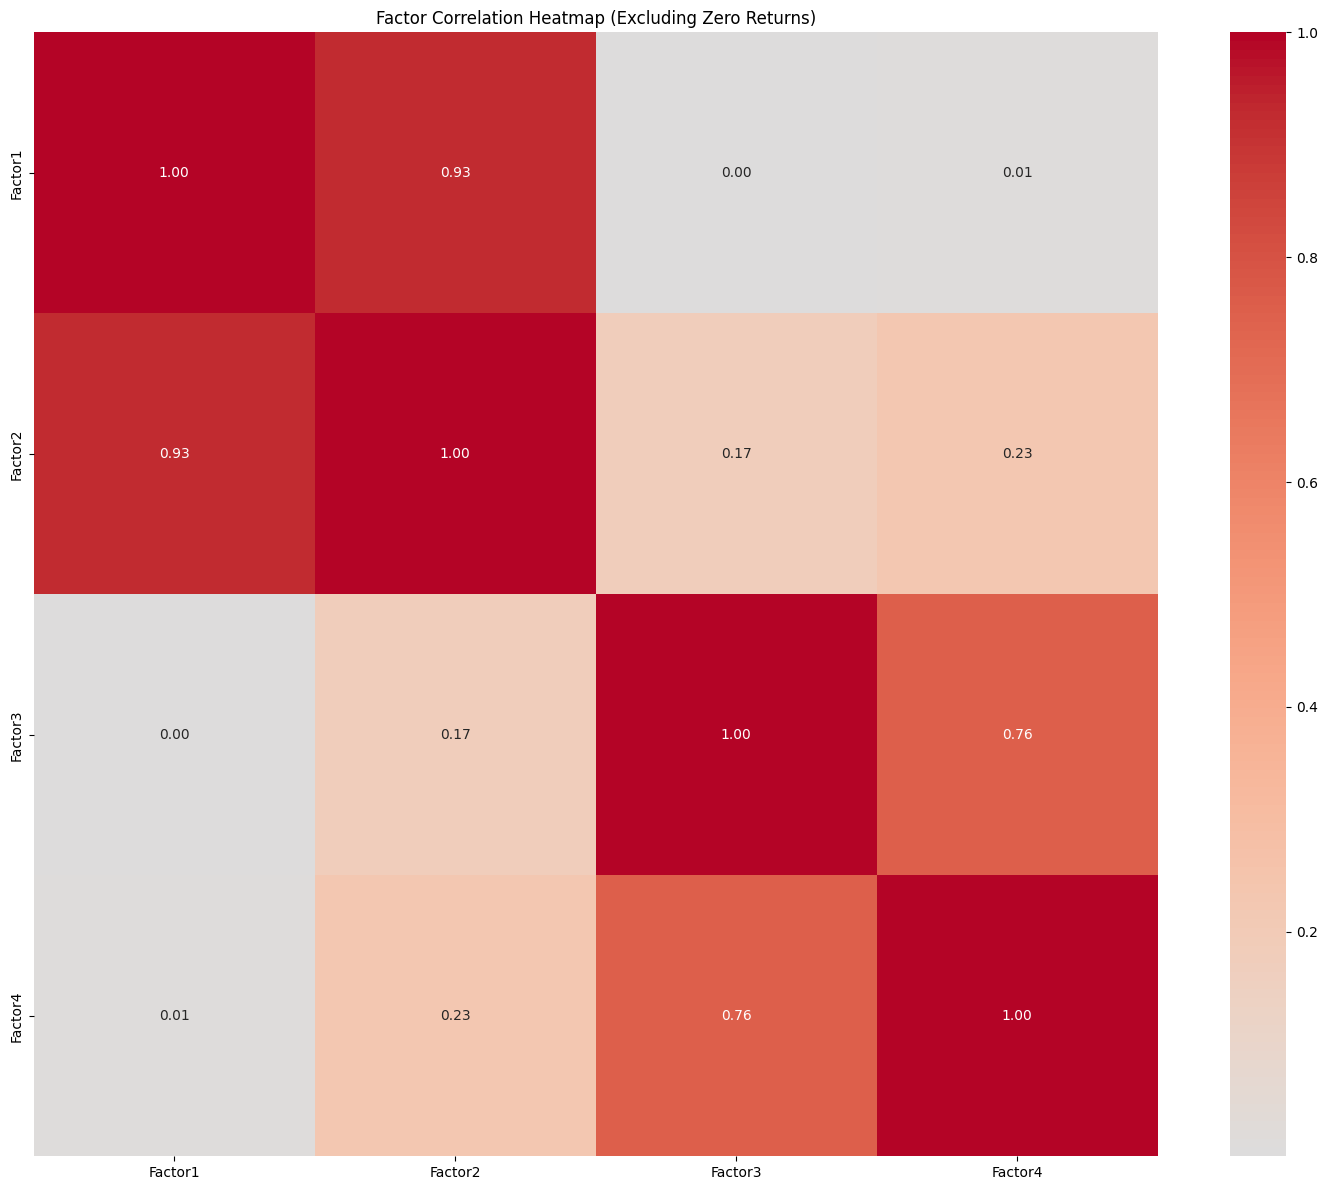

因子相关性热力图已保存至: factor_results/factor_correlation.png

相关性矩阵：


,Factor1,Factor2,Factor3,Factor4
Factor1,1.000000,0.928707,0.000326,0.009709
Factor2,0.928707,1.000000,0.173580,0.227978
Factor3,0.000326,0.173580,1.000000,0.755156
Factor4,0.009709,0.227978,0.755156,1.000000


In [7]:
# 初始化
factor_metrics = FactorMetrics(data_dir='data')

# 加载数据
factors, returns = factor_metrics.load_data()

# 计算相关性矩阵并画图
corr_matrix = factor_metrics.plot_factor_corr(
    factors,
    returns,  
    save_path='factor_results/factor_correlation.png'
)

# 如果需要查看相关性矩阵
print("\n相关性矩阵：")
corr_matrix

## 5.画出每个因子每组的收益曲线

加载因子数据...
加载收益率数据...
转换收益率数据格式...

数据预处理完成。
计算5分组收益...
分组收益曲线已保存至: factor_results/factor1_returns_analysis.png


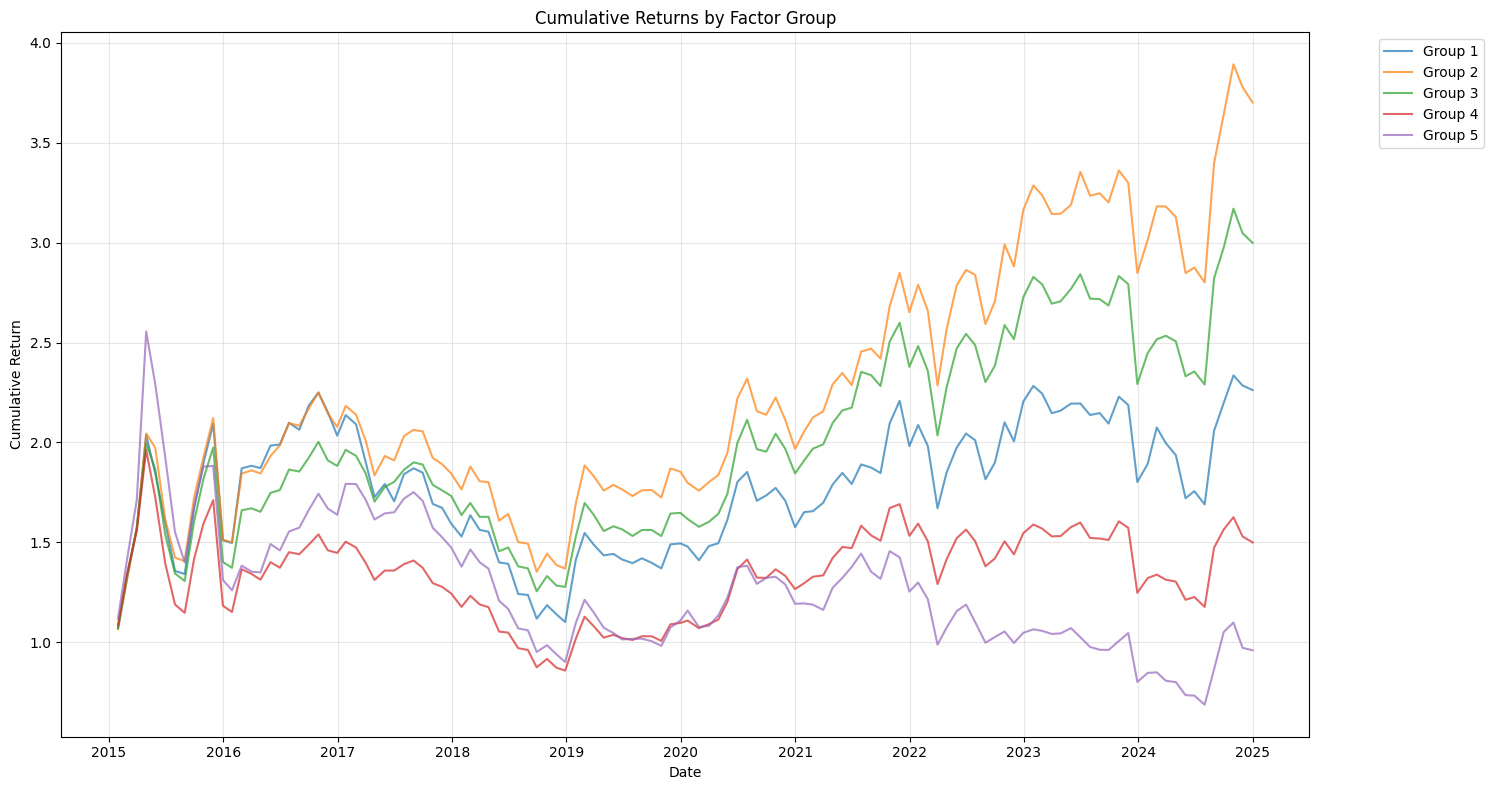


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor1,,,,,,
0,0.085067,0.308120,0.276083,-0.510632,0.500000,0.276083
1,0.139850,0.290954,0.480660,-0.399070,0.508333,0.480660
2,0.116105,0.282288,0.411301,-0.373484,0.533333,0.411301
3,0.041356,0.288068,0.143564,-0.562842,0.491667,0.143564
4,-0.004082,0.341720,-0.011945,-0.731137,0.475000,-0.011945


In [2]:
# 初始化
factor_metrics = FactorMetrics(data_dir='data')

# 加载数据
factors, returns = factor_metrics.load_data()

# 选择要分析的因子
factor_name = 'Factor1'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=1,  # 因子方向
    save_path='factor_results/factor1_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics


计算5分组收益...
分组收益曲线已保存至: factor_results/factor2_returns_analysis.png


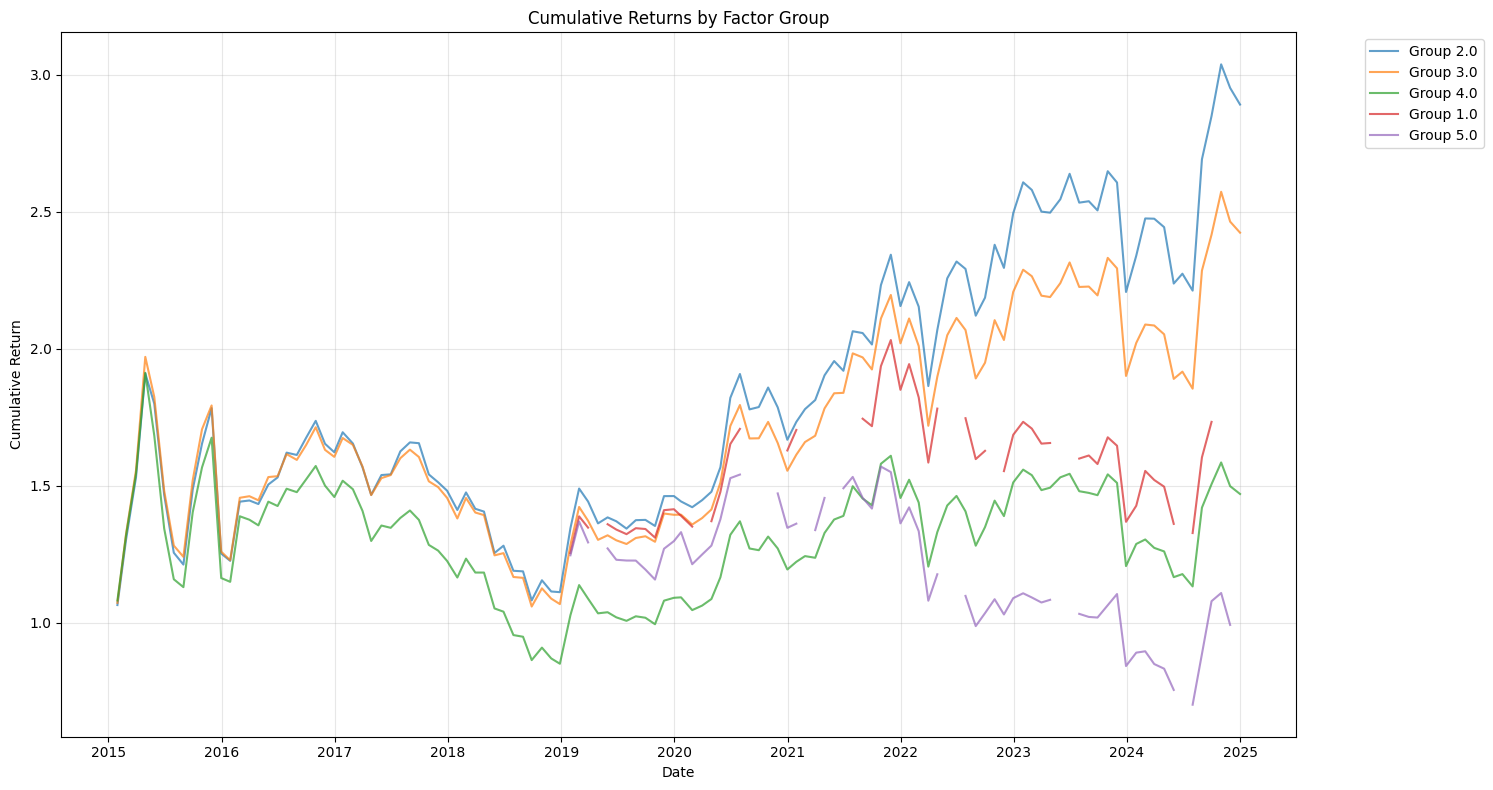


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor2,,,,,,
1.0,0.112017,0.277491,0.403677,-0.433530,0.516667,0.403677
2.0,0.092574,0.280615,0.329897,-0.462304,0.525000,0.329897
3.0,0.039294,0.292282,0.134438,-0.555123,0.475000,0.134438
0.0,0.052938,0.257553,0.205542,-0.346610,0.225000,0.205542
4.0,-0.000755,0.299388,-0.002522,-0.553385,0.241667,-0.002522


In [3]:
# 选择要分析的因子
factor_name = 'Factor2'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=1,  # 因子方向
    save_path='factor_results/factor2_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics

计算5分组收益...
分组收益曲线已保存至: factor_results/factor3_returns_analysis.png


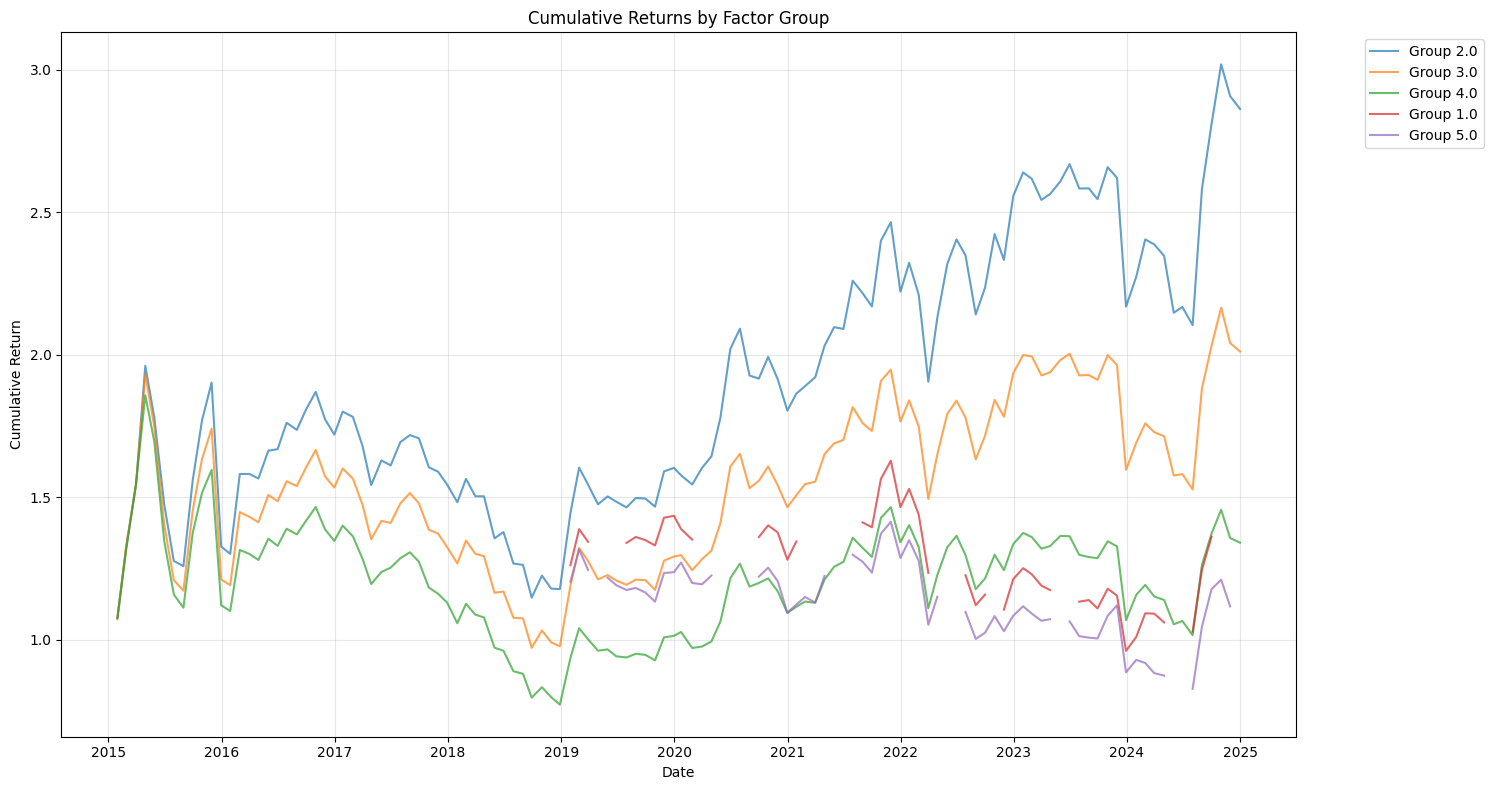


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor3,,,,,,
1.0,0.110903,0.289694,0.382829,-0.414612,0.500000,0.382829
2.0,0.072399,0.290448,0.249267,-0.496616,0.508333,0.249267
3.0,0.029784,0.286066,0.104115,-0.584149,0.483333,0.104115
0.0,0.028877,0.256780,0.112459,-0.409560,0.183333,0.112459
4.0,0.011183,0.261078,0.042834,-0.414321,0.225000,0.042834


In [4]:
# 选择要分析的因子
factor_name = 'Factor3'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=1,  # 因子方向
    save_path='factor_results/factor3_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics

计算5分组收益...
分组收益曲线已保存至: factor_results/factor4_returns_analysis.png


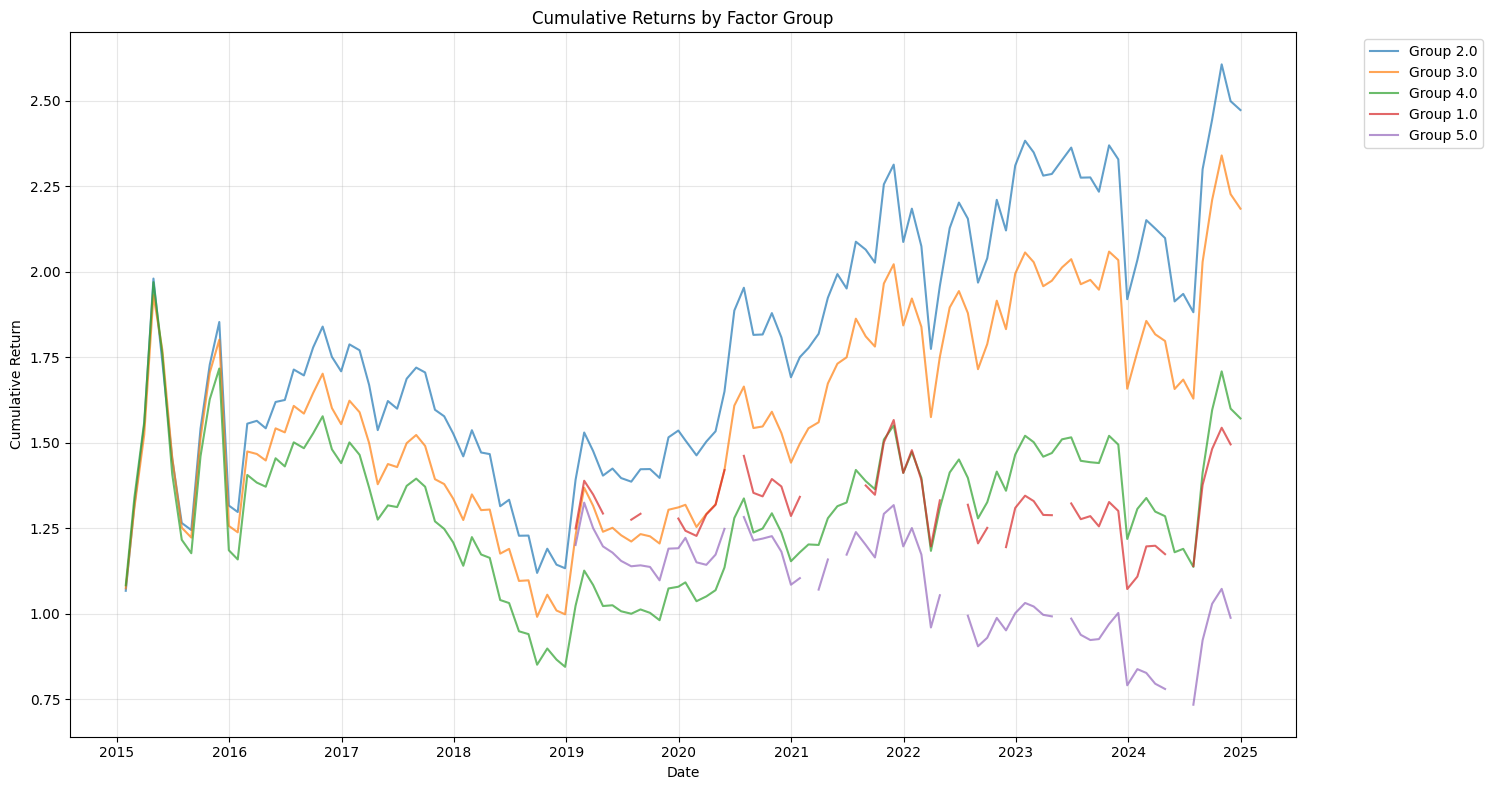


因子评估指标：


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Win Rate,Return/Risk Ratio
Factor4,,,,,,
1.0,0.094771,0.287984,0.329083,-0.434679,0.525000,0.329083
2.0,0.081278,0.289373,0.280876,-0.486959,0.525000,0.280876
3.0,0.046234,0.295808,0.156296,-0.571100,0.483333,0.156296
0.0,0.041053,0.247923,0.165588,-0.315506,0.225000,0.165588
4.0,-0.001183,0.255262,-0.004633,-0.445961,0.250000,-0.004633


In [5]:
# 选择要分析的因子
factor_name = 'Factor4'  # 替换为你要分析的因子名称
factor_data = factors[factor_name]

# 分析因子收益
group_returns, cum_returns, metrics = factor_metrics.analyze_factor_returns(
    factor_data,
    returns,
    n_groups=5,  # 分组数量
    factor_direction=1,  # 因子方向
    save_path='factor_results/factor4_returns_analysis.png'
)

# 查看评估指标
print("\n因子评估指标：")
metrics